
# K-Means Clustering 
## Working Principle Introduction

K-means clustering works by partitioning the dataset into K distinct clusters based on the features present in the data. Initially, K centroids are chosen randomly. Each data point is then assigned to its nearest centroid, and the centroid's position is updated to be the mean of the points assigned to it. This process of assignment and update is iterated upon until the centroids stabilize and the assignment of points to clusters no longer changes, which means the algorithm has converged and the clustering is complete.

Here is some core formula for k-means:
1. **Assignment Step**:
Each data point is assigned to the closest cluster by minimizing the distance between the point and the cluster centroid. This is typically the Euclidean distance. The formula for the assignment of a point  is:
    $$C_j = \{x^{(i)} : \| x^{(i)} - \mu_j \| \le \| x^{(i)} - \mu_k \|, \forall k, 1 \le k \le K\} $$

2. **Update Step**:
The centroids of the clusters are recalculated to be the mean of all points assigned to the cluster. The formula for updating the centroid is:

$$
\mu_j = \frac{1}{|C_j|} \sum_{x^{(i)} \in C_j} x^{(i)}\
$$

<div align="center">
<img src="k-Means.png" alt="alt text" width="450"/>
</div>
    
The image depicts the K-means clustering process. On the left, we see a scatter of unlabelled data points. On the right, these points are grouped into three clusters, each with a central 'X' marking the centroid. The transformation from unlabelled to labelled clusters is shown as the effect of the K-means algorithm.

## Data Processing
In the data processing stage of my analysis, I focused on preparing the Wine Quality dataset for the K-means clustering algorithm. Given that K-means is sensitive to the scale of the data, I performed standardization, which is a crucial step to ensure that each feature contributes equally to the result. 

In [104]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Load the dataset (replace with the correct path or URL)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_data = pd.read_csv(url, delimiter=';')
wine_data.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [105]:

# Standardizing the features
from sklearn.preprocessing import StandardScaler
# Assuming the target variable is 'quality' and should not be included in the clustering
X = wine_data.drop('quality', axis=1).values
y= wine_data['quality']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X=X_scaled


## K-Means Clustering Manipulation
In the K-means clustering step of my analysis, I executed the algorithm in several stages as depicted in the images. Initially, I randomly selected k points as the initial centroids. Then, I iterated through two main phases: the assignment phase, where each data point was associated with the nearest centroid, and the update phase, where the centroids were recalculated as the mean of the points assigned to them.This iterative process was repeated until the centroids' positions stabilized, indicating that the clusters had been formed and the algorithm had converged.During the K-means algorithm application, I produced comparative visualizations to highlight the transformation from the original unclustered data to the clearly defined clusters formed through the process.


In [106]:
def colors(y):
    if y == 3:
        return "red"
    elif y == 4:
        return "green"
    elif y == 5:
        return "yellow"
    elif y == 6:
        return "blue"
    elif y == 7:
        return "purple"
    else:
        return "orange"

c = [colors(label) for label in y]

In [107]:
centers = []
for k in range(6):
    i = np.random.randint(0, 100)
    point = (X[i, 0], X[i, 1], k)
    centers.append(point)

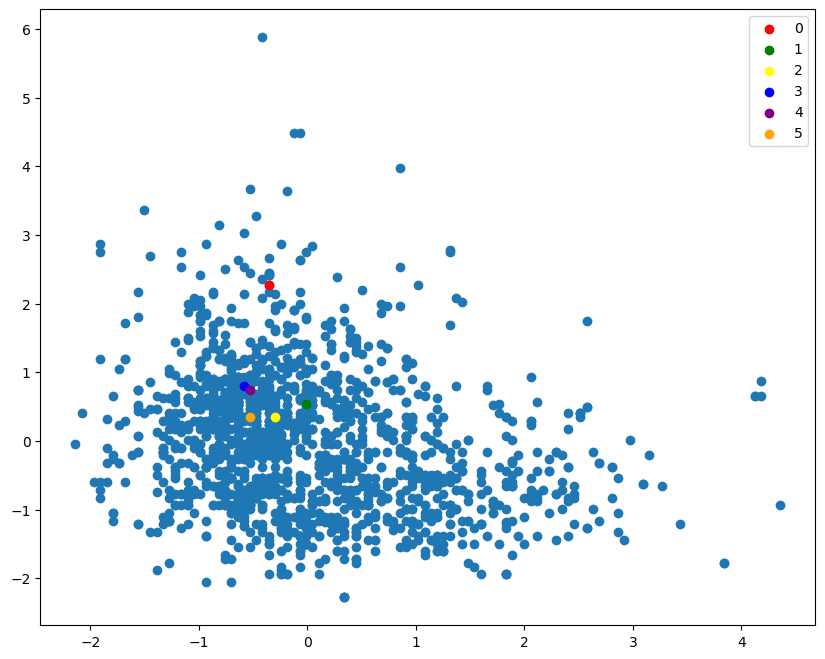

In [118]:
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter([centers[0][0]], [centers[0][1]], color = "red", label = centers[0][2])
plt.scatter([centers[1][0]], [centers[1][1]], color = "green", label = centers[1][2])
plt.scatter([centers[2][0]], [centers[2][1]], color = "yellow", label = centers[2][2])
plt.scatter([centers[3][0]], [centers[3][1]], color = "blue", label = centers[3][2])
plt.scatter([centers[4][0]], [centers[4][1]], color = "purple", label = centers[4][2])
plt.scatter([centers[5][0]], [centers[5][1]], color = "orange", label = centers[5][2])
plt.legend()
plt.show()

In [109]:

def distance(i, X, center):
    return np.sqrt(sum((X[i, j] - center[j])**2 for j in range(2)))
def assign_label(i, X, centers):
    distances = np.array([distance(i, X, center) for center in centers])
    label = np.argmin(distances)
    return label 
def assign_clusters(X, centers):
    return [assign_label(i, X, centers) for i in range(len(X))]



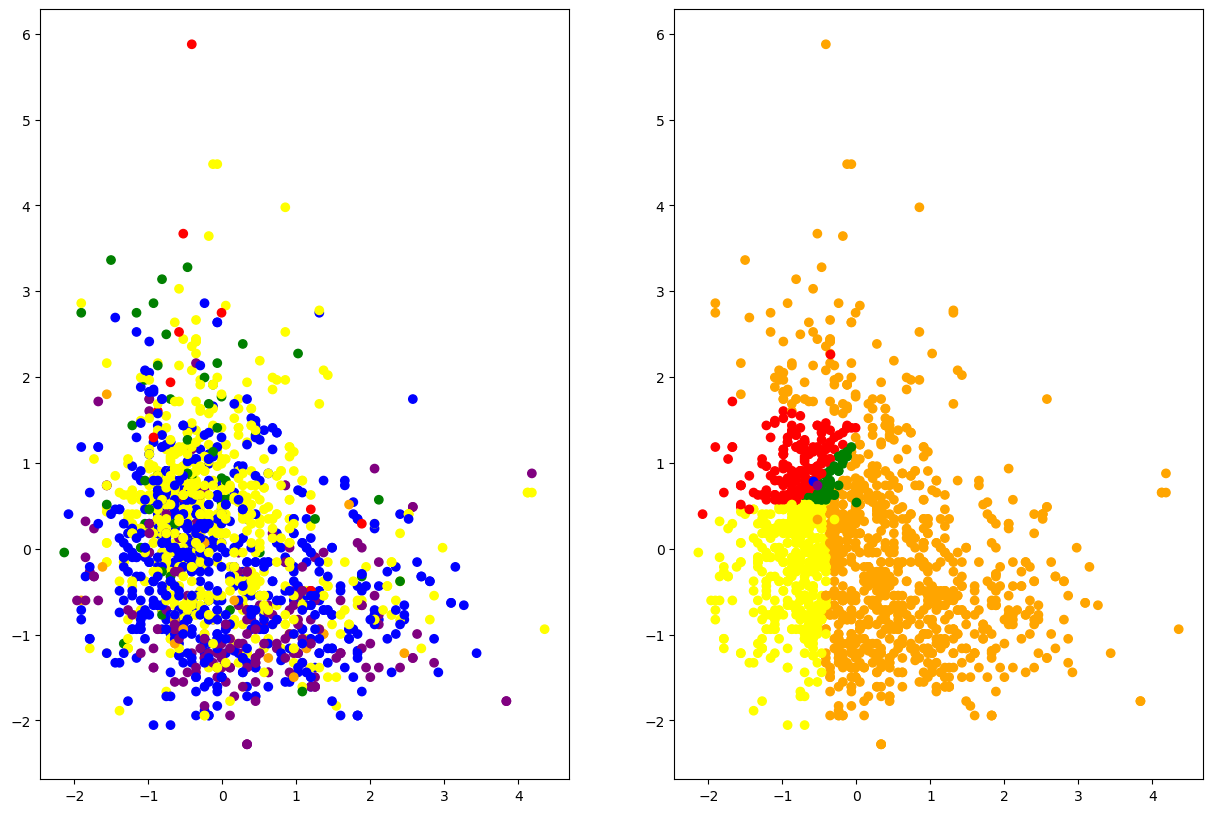

In [119]:
current_labels = assign_clusters(X, centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
ax2.scatter([centers[0][0]], [centers[0][1]], color = "red", label = centers[0][2])
ax2.scatter([centers[1][0]], [centers[1][1]], color = "green", label = centers[1][2])
ax2.scatter([centers[2][0]], [centers[2][1]], color = "yellow", label = centers[2][2])
ax2.scatter([centers[3][0]], [centers[3][1]], color = "blue", label = centers[3][2])
ax2.scatter([centers[4][0]], [centers[4][1]], color = "purple", label = centers[4][2])
ax2.scatter([centers[5][0]], [centers[5][1]], color = "orange", label = centers[5][2])
plt.show()

In [111]:

def update_centers(X, centers):
    current_labels = assign_clusters(X, centers)
    k = len(centers)
    center_means = {i : [0, 0] for i in range(k)}
    for i in range(len(X)):
        center_means[current_labels[i]][0] += X[i, 0]
        center_means[current_labels[i]][1] += X[i, 1]

    for i in range(k):
        num_occur = current_labels.count(i)
        center_means[i][0] = center_means[i][0]/num_occur
        center_means[i][1] = center_means[i][1]/num_occur
    
    return [(center_means[i][0], center_means[i][1]) for i in center_means]

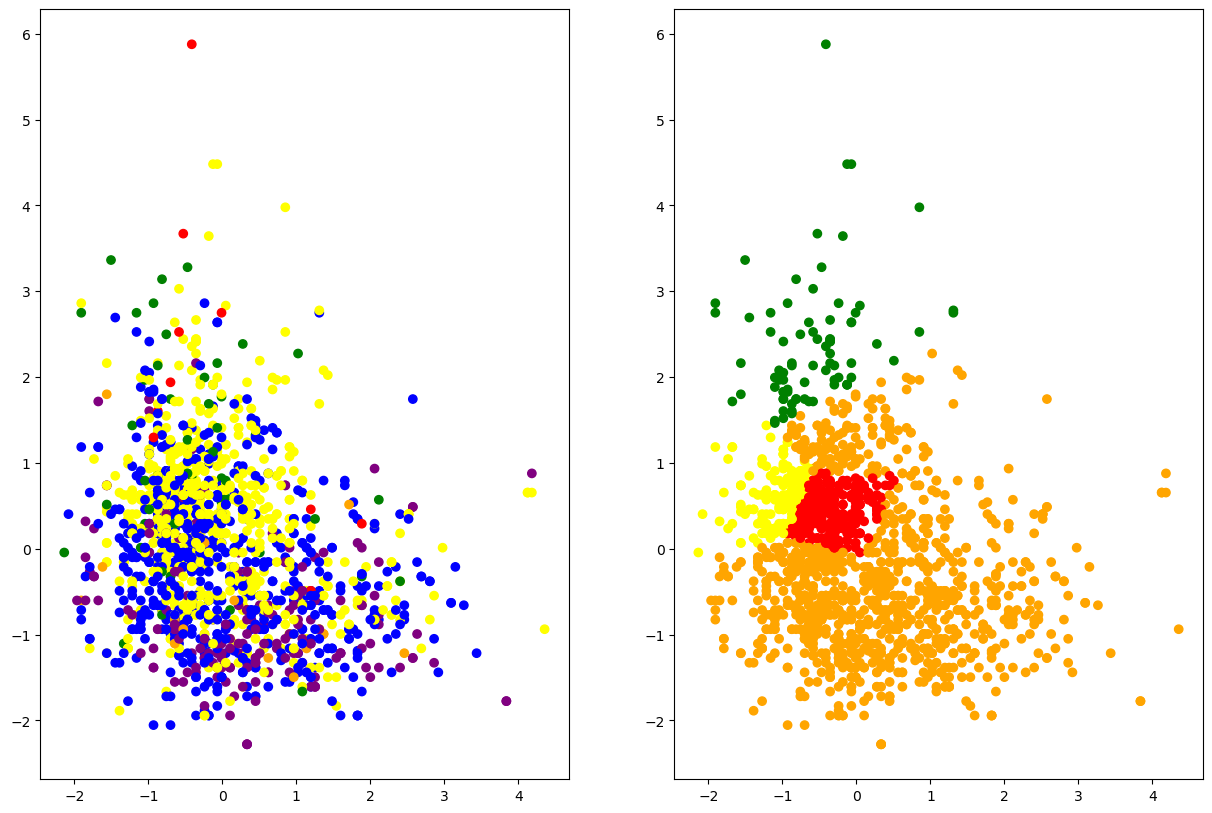

In [76]:
new_centers = update_centers(X, centers)
current_labels = assign_clusters(X, new_centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)

In [130]:
def k_means_clustering(X, k, max_iter = 100):
    centers = []
    for j in range(k):
        i = np.random.randint(0, 100)
        point = (X[i, 0], X[i, 1], j)
        centers.append(point)
    
    for _ in range(max_iter):
        centers = update_centers(X, centers)

    return centers

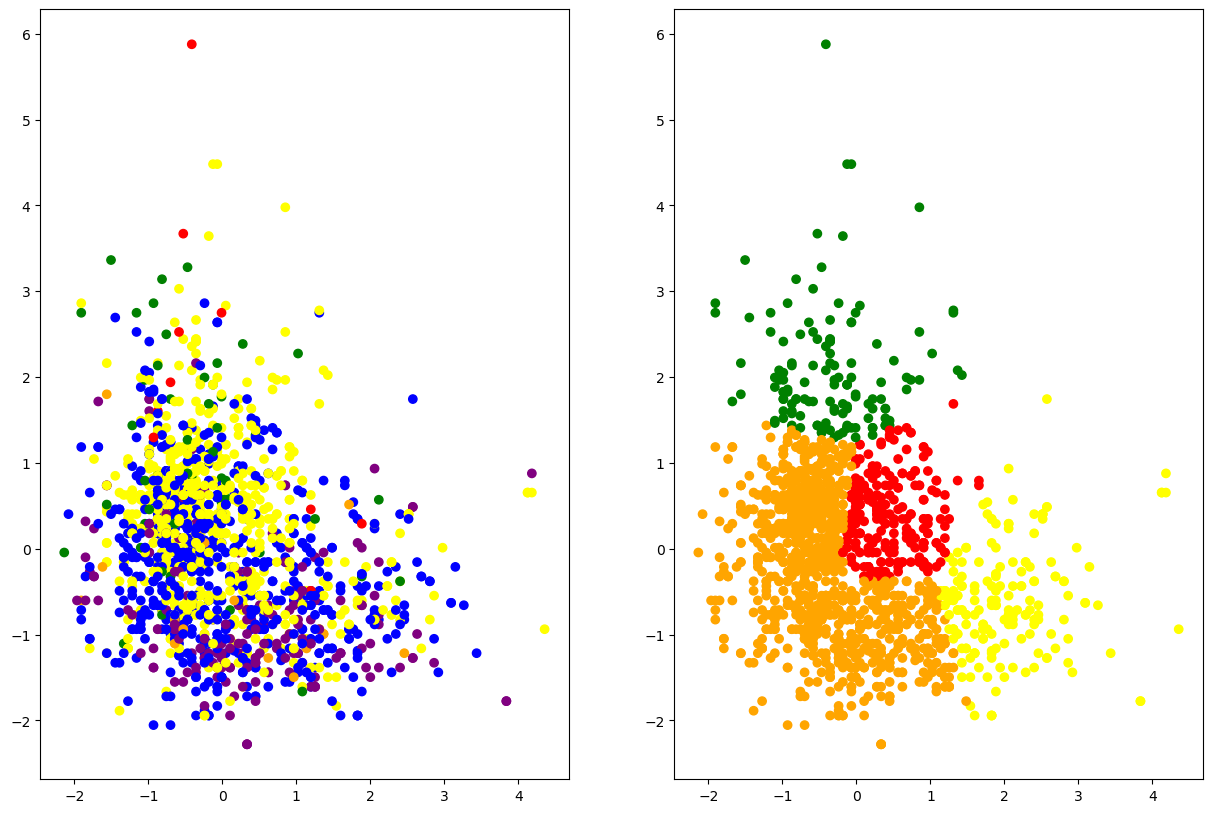

In [131]:
centers = k_means_clustering(X,6)
current_labels = assign_clusters(X, centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
plt.show()


## Conclusion

The visualizations effectively illustrate this clear separation, demonstrating that K-means was able to discern and group the data points into cohesive clusters that likely reflect underlying patterns or relationships within the dataset. Upon implementing the K-means clustering algorithm on the dataset with an initial k value of 6, the final outcome presents an interesting result. The visualization indicates that, despite setting out to identify six distinct clusters, the algorithm effectively converged to identify only four unique clusters within the data. This phenomenon could be due to several data points being equidistant from multiple centroids or due to some centroids converging to very close or identical positions in the feature space.
